### Batch fitting

In [1]:
from spec_deconv import spec_deconv

import glob

Spectral deconvolution module loaded: 6 peaks.
Spectral deconvolution module loaded: 6 peaks.


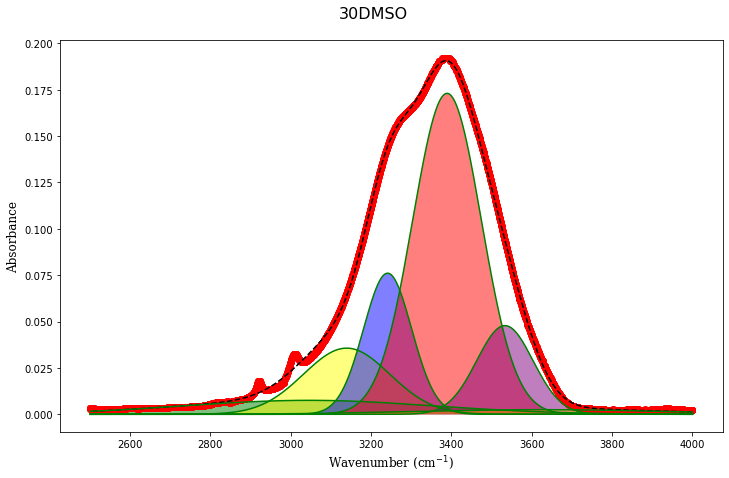

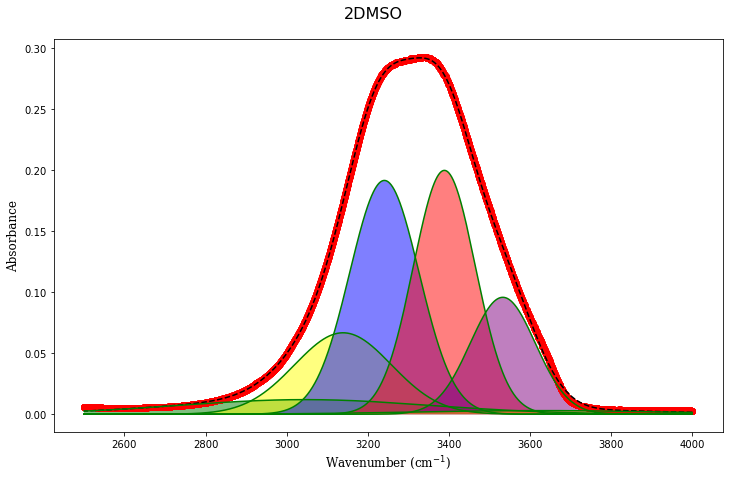

In [2]:
for fh in glob.glob('data/*.txt'):
    ftir = spec_deconv(6)
    data = ftir.load(fh)
    x, y = ftir.pretty_data(data, 2500)
    
    ftir.fun('gaussian')
    centroids = [3045, 3139, 3241, 3389, 3533, 3629]
    params = ftir.auto_params(centroids, lower=0.95, upper=1.05)
    ftir.fix_centroid(params)
    
    fit = ftir.fit(params, x, y, method='least_squares')
    ftir.plot_all(fit.params, name=fh[15:-4])